# Cross-correlation procedure in three steps

In [1]:
# Importando as bibliotecas
import numpy
from time import time
from matplotlib import pyplot
from codes.prism import prism_tf
from codes.grids import regular_grid
from codes.plot import draw_prism
from codes.auxiliars import addnoise
from codes.auxiliars import rotate3D_xyz
from codes.statistical import analysis

In [2]:
# Numero de pontos e shape do dado
nx, ny = 40, 40
area = (-4000., 4000., -4000., 4000.)
shape = (nx, ny)
xo, yo, zo = regular_grid(area, shape, -100.)

In [ ]:
# Rotacionando os dados
xr, yr, zr = rotate3D_xyz(xo, yo, zo, -45.)

(Teste 5) Anomalia magnéntica em baixa latitude geográfica

In [3]:
# Define modelo e direcoes
dike = [-500., 500., -1500., 1500., 200., 2000., 0.9975]
inc, dec, incs, decs = -45., 40., -5., 6. 

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

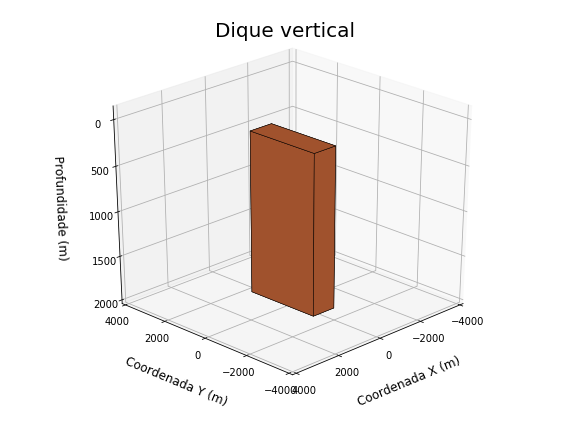

In [197]:
# Plota a figura do modelo sintetico
figure = pyplot.figure(figsize=(8,6))
ax = figure.gca(projection = '3d')
ax.set_title('Dique vertical', size = 20)

# Vertices do prisma
# Lista com as arestas do prisma
x1, x2, y1, y2, z1, z2 = dike[:6]
v = numpy.array([[x1, y1, z2], [x1, y2, z2], [x2, y2, z2], [x2, y1, z2], 
                 [x1, y1, z1], [x1, y2, z1], [x2, y2, z1], [x2, y1, z1]])
# ax.scatter3D(v[:, 0], v[:, 1], v[:, 2])
vertices = [[v[0],v[1],v[2],v[3]], [v[0],v[1],v[5],v[4]], [v[1],v[2],v[6],v[5]],
            [v[2],v[3],v[7],v[6]], [v[3],v[0],v[4],v[7]], [v[4],v[5],v[6],v[7]]]
# Plota os lados
ax.add_collection3d(Poly3DCollection(vertices, facecolors = 'sienna', linewidths = 0.5, 
                                     edgecolors = 'k', alpha = .1))

# Escala da projecao
x_scale = 1.
y_scale = 1.
z_scale = 1.25
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj

# Labels
ax.set_xlabel('Coordenada X (m)', size = 12, labelpad = 20)
ax.set_ylabel('Coordenada Y (m)', size = 12, labelpad = 20)
ax.set_zlabel('Profundidade (m)', size = 12, labelpad = 20)
ax.set_xlim(xo.min(), xo.max())
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(zo.min(), z2)
ax.set_xticks(numpy.linspace(xo.min(), xo.max(), 5))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 5))
ax.set_zticks(numpy.linspace(0., z2, 5))

# Angulo de visualizacao
ax.view_init(210, 135)

pyplot.tight_layout(True)
pyplot.savefig('figs-seminario2018/fig05-modelo3D.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [6]:
# Calcula a anomalia de campo total
tf5 = prism_tf(xo, yo, zo, dike, inc, dec, incs, decs)

In [7]:
# Analise do dado
print 'Anomalia magnetica:'
_ = analysis(tf5, 'nT')

Anomalia magnetica:
Minimum:    -218.4859 nT
Maximum:    157.1451 nT
Mean value: -2.2346 nT
Variation:  375.6310 nT


In [8]:
# Adicao de ruido
tf5 = addnoise(tf5, 5., 0.1)

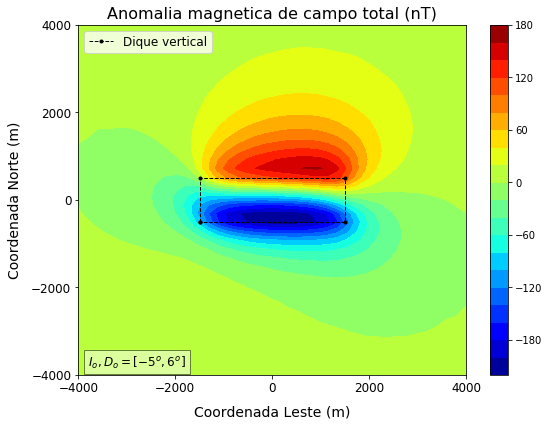

In [196]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf5.reshape(shape), 
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike[:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.text(-3800., -3800., '$I_o, D_o = [-5^o, 6^o]$', 
            fontsize = 12.,bbox=dict(facecolor='white', edgecolor='k', alpha = 0.5))
pyplot.title('Anomalia magnetica de campo total (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper left', fontsize = 'large')
pyplot.tight_layout(True)

pyplot.savefig('figs-seminario2018/fig05-anomaly.png', dpi = 300, transparence = True, bbox_inches = 'tight')
pyplot.show()

In [10]:
# Importa os filtros
from codes.statistical import cccoef
from codes.filtering import reduction
from codes.derivative import totalgrad, zderiv

In [11]:
# Cria os grids de inclinacao
inclination5 = numpy.linspace(-90., 90., 361)
declination5 = numpy.linspace(-90., 90., 181)
D5, I5 = numpy.meshgrid(declination5, inclination5)

In [12]:
# Cria a matriz de zeros
res5 = numpy.zeros_like(D5)

In [13]:
# Reshape do dado
xobs = xo.reshape(shape)
yobs = yo.reshape(shape)
tf5 = tf5.reshape(shape)

In [14]:
# Primeira correlacao para o teste 1
#initial = time()
#for k2, d in enumerate(declination5):
#    for k1, i in enumerate(inclination5):
#            rtp = reduction(xobs, yobs, tf5, inc, dec, i, d)
#            res5[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
#                                 zderiv(xobs, yobs, rtp))        
#final = time()
#print 'Tempo de calculo (sec): %.3f' % (final-initial)
# Primeira correlacao para o teste 1
initial = time()
for k2, d in enumerate(declination5):
    for k1, i in enumerate(inclination5):
        if i == 0. or d == 0.:
            rtp = reduction(xobs, yobs, tf5, inc, dec, i + 0.75, d + 0.5)
            res5[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                    zderiv(xobs, yobs, rtp)) 
        else:
            rtp = reduction(xobs, yobs, tf5, inc, dec, i, d)
            res5[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                 zderiv(xobs, yobs, rtp))        
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

codes/auxiliars.py:199: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


Tempo de calculo (sec): 73.605


In [15]:
print 'Maxima correlacao:', res5.max()
print 'Minima correlacao:', res5.min()

Maxima correlacao: 0.683045016937
Minima correlacao: -0.706390805615


In [16]:
imax5, jmax5 = numpy.where(res5 == res5.max())
imin5, jmin5 = numpy.where(res5 == res5.min())
incmax5 = float(I5[imax5, jmax5])
decmax5 = float(D5[imax5, jmax5])
incmin5 = float(I5[imin5, jmin5])
decmin5 = float(D5[imin5, jmin5])
print '(I,D) maximo:', incmax5, decmax5

(I,D) maximo: -0.5 -62.0


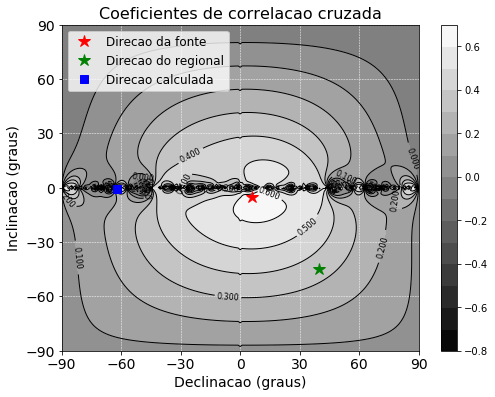

In [24]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig5a = pyplot.contour(D5, I5, res5, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D5, I5, res5, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig5a, fontsize = 8)
#pyplot.plot(dec, inc, 'r*', label = 'Direcao verdadeira', markersize = 10)
pyplot.plot(decs, incs, 'r*', label = 'Direcao da fonte', markersize = 12)
pyplot.plot(dec, inc, 'g*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmax5, incmax5, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D5.min(), D5.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I5.min(), I5.max(), 7), fontsize = 14)
pyplot.legend(loc = 'upper left', fontsize = 'large')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/fig05-correlation.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [25]:
# Calculo da reducao ao Polo
rtp5 = reduction(xo.reshape(shape), yo.reshape(shape), tf5.reshape(shape), inc, dec, incmax5, decmax5)

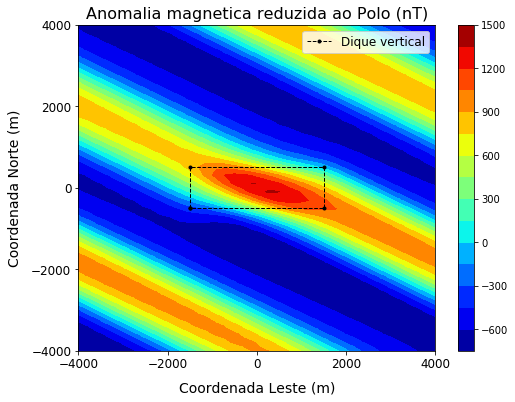

In [26]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp5,
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike[:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper right', fontsize = 'large')

pyplot.savefig('figs-seminario2018/fig05-first-reduced-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [28]:
# Novo grid de inclinacao e declinacao
inclination5low = numpy.linspace(-15., 15., 181)
declination5low = numpy.linspace(-90., 90., 361)
D5low, I5low = numpy.meshgrid(declination5low, inclination5low)

In [29]:
# Cria a matriz de zeros
res5low = numpy.zeros_like(D5low)

In [30]:
# Primeira correlacao para o teste 1
initial = time()
for k2, d in enumerate(declination5low):
    for k1, i in enumerate(inclination5low):
        if i == 0. or d == 0.:
            rtp = reduction(xobs, yobs, tf5, inc, dec, i + 0.75, d + 0.5)
            res5low[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                    zderiv(xobs, yobs, rtp)) 
        else:
            rtp = reduction(xobs, yobs, tf5, inc, dec, i, d)
            res5low[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                 zderiv(xobs, yobs, rtp))        
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 69.353


In [31]:
print 'Maxima correlacao:', res5low.max()
print 'Minima correlacao:', res5low.min()

Maxima correlacao: 0.823133093091
Minima correlacao: -0.811714147612


In [32]:
imax5low, jmax5low = numpy.where(res5low == res5low.max())
imin5low, jmin5low = numpy.where(res5low == res5low.min())
incmax5low = float(I5low[imax5low, jmax5low])
decmax5low = float(D5low[imax5low, jmax5low])
incmin5low = float(I5low[imin5low, jmin5low])
decmin5low = float(D5low[imin5low, jmin5low])
print '(I,D) maximo:', incmax5low, decmax5low
print '(I,D) minimo:', incmin5low, decmin5low

(I,D) maximo: -0.166666666667 -71.0
(I,D) minimo: 0.166666666667 72.0


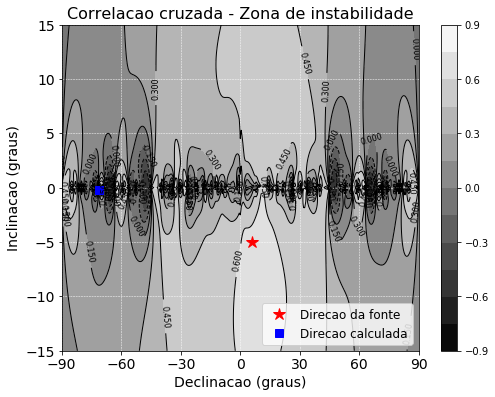

In [83]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig5b = pyplot.contour(D5low, I5low, res5low, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D5low, I5low, res5low, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig5b, fontsize = 8)
pyplot.plot(decs, incs, 'r*', label = 'Direcao da fonte', markersize = 12)
#pyplot.plot(dec, inc, 'g*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmax5low, incmax5low, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Correlacao cruzada - Zona de instabilidade', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D5low.min(), D5low.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I5low.min(), I5low.max(), 7), fontsize = 14)
pyplot.legend(loc = 'lower right', fontsize = 'large')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/fig05-low_correlation.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [39]:
# Calculo da reducao ao Polo
rtp5low = reduction(xo.reshape(shape), yo.reshape(shape), tf5.reshape(shape), inc, dec, incmax5low, decmax5low)

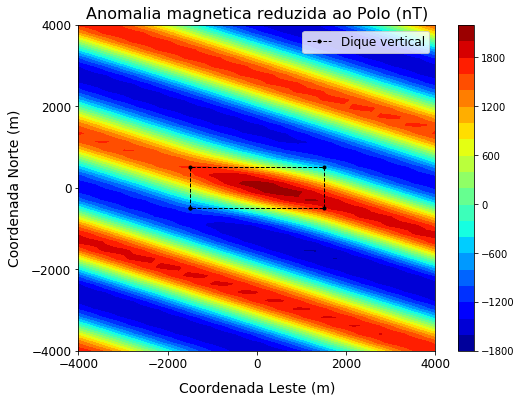

In [40]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp5low,
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike[:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper right', fontsize = 'large')

pyplot.savefig('figs-seminario2018/fig05-second-reduced-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [41]:
from codes.equivalentlayer import layer, fit_layer, rtp_layer

In [42]:
# Construindo uma camada equivalente
area_layer = area
shape_layer = (12, 12)
level = 1200.

In [43]:
# Para plot:
xlayer, ylayer, zlayer = regular_grid(area, shape_layer, level)

In [44]:
# Calcula a camada equivalente
eqlayer = layer(area_layer, shape_layer, level)

In [45]:
# Aloca todos os valores em uma lista
data = [xo, yo, zo, tf5.reshape(tf5.size)]

In [46]:
# Calcula o dado predito}
parameters, tf_pred = fit_layer(data, shape, eqlayer, shape_layer, 0.1, inc, dec, incs, decs)

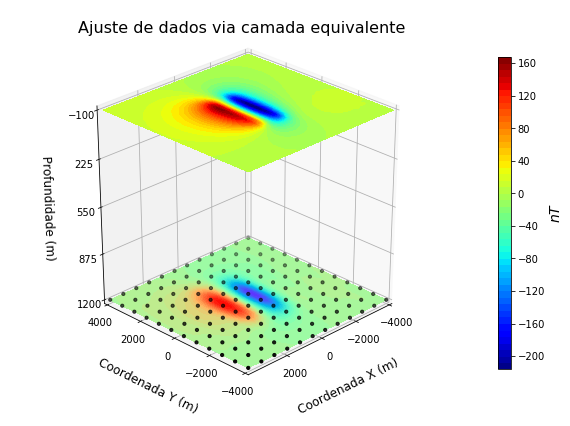

In [49]:
# Plota a figura do modelo sintetico
figure = pyplot.figure(figsize=(8,6))
ax = figure.gca(projection = '3d')
ax.set_title('Ajuste de dados via camada equivalente', size = 16, pad = 10)

# Vertices do prisma
# Lista com as arestas do prisma
x1, x2, y1, y2, z1, z2 = dike[:6]
v = numpy.array([[x1, y1, z2], [x1, y2, z2], [x2, y2, z2], [x2, y1, z2], 
                 [x1, y1, z1], [x1, y2, z1], [x2, y2, z1], [x2, y1, z1]])
# ax.scatter3D(v[:, 0], v[:, 1], v[:, 2])
vertices = [[v[0],v[1],v[2],v[3]], [v[0],v[1],v[5],v[4]], [v[1],v[2],v[6],v[5]],
            [v[2],v[3],v[7],v[6]], [v[3],v[0],v[4],v[7]], [v[4],v[5],v[6],v[7]]]
# Plota os lados
#ax.scatter3D(xo.reshape(shape), yo.reshape(shape), zo.reshape(shape), s=0.5, c = 'k')
p1 = ax.contourf(xo.reshape(shape), yo.reshape(shape), tf5.reshape(shape),
                 50, zdir='z', offset = zo.min(), cmap = 'jet')

#ax.add_collection3d(Poly3DCollection(vertices, facecolors = 'sienna', 
#                                     linewidths = 0.75,  edgecolors = 'sienna', alpha = .1))

ax.scatter3D(xlayer.reshape(shape_layer), ylayer.reshape(shape_layer), zlayer.reshape(shape_layer), 
             s = 10., c = 'k')
p2 = ax.contourf(xo.reshape(shape), yo.reshape(shape), tf_pred.reshape(shape),
                 50, zdir='z', offset = level, cmap = 'rainbow',
                  vmin = numpy.min(tf5), vmax = numpy.max(tf5))
#p2 = ax.contourf(xo.reshape(shape), yo.reshape(shape), level*numpy.ones(shape),
#                 50, zdir='z', offset = level, cmap = 'jet') 
#                 vmin = numpy.min(tf5), vmax = numpy.max(tf5))
cbar1 = pyplot.colorbar(p1, aspect = 25, fraction = 0.025, orientation="vertical")
cbar1.set_label('$ nT $', fontsize = 14, rotation = 90)

# Escala da projecao
x_scale = 1.
y_scale = 1.
z_scale = 1.25
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj
# Labels
ax.set_xlabel('Coordenada X (m)', size = 12, labelpad = 20)
ax.set_ylabel('Coordenada Y (m)', size = 12, labelpad = 20)
ax.set_zlabel('Profundidade (m)', size = 12, labelpad = 20)
ax.set_xlim(xo.min(), xo.max())
ax.set_xticks(numpy.arange(xo.min(), xo.max(), 2000.))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 5))
ax.set_zticks(numpy.linspace(zo.min(), level, 5))
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(zo.min(), level)
# Angulo de visualizacao
ax.view_init(210, 135)
pyplot.tight_layout(True)
#Salva as figuras
pyplot.savefig('figs-seminario2018/fig05-ajuste_camada.png', dpi = 300, transparence = True, bbox_inches = 'tight')
pyplot.show()

In [50]:
'''# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf_pred.reshape(shape),
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike[:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
#pyplot.text(500., -2200., '$I_o, D_o = [-5^o, -6^o]$', 
#            fontsize = 12.,bbox=dict(facecolor='black', edgecolor='k', alpha = 0.25))
pyplot.title('Anomalia de campo total predita (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'lower center', fontsize = 'large')

pyplot.savefig('figs-seminario2018/fig05-first-predicted-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

# Plota o residuo calculado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), ((tf5.reshape(tf5.size))-tf_pred).reshape(shape),
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike[:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.title('Residuo calculado (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper right', fontsize = 'large')

pyplot.savefig('figs-seminario2018/fig05-first-residual.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

# Plota a distribuicao dos parametros
pyplot.figure(figsize=(8, 6))
pyplot.imshow(parameters.reshape(shape_layer), cmap = pyplot.cm.jet)
pyplot.title('Distribuicao de propriedade fisica $(A/m^2)$', fontsize = 14)
pyplot.xlabel('Posicao em X (m)', fontsize = 12, labelpad = 10)
pyplot.ylabel('Posicao em Y (m)', fontsize = 12, labelpad = 10)
pyplot.xticks(fontsize = 12)
pyplot.yticks( fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper right', fontsize = 'large')

pyplot.savefig('figs-seminario2018/fig05-parameter-vector.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()'''

"# Plota o resultado\npyplot.figure(figsize=(8, 6))\npyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf_pred.reshape(shape),\n                20, cmap = pyplot.cm.jet)\n# Contorno do modelo\ndraw_prism(dike[:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)\n#pyplot.text(500., -2200., '$I_o, D_o = [-5^o, -6^o]$', \n#            fontsize = 12.,bbox=dict(facecolor='black', edgecolor='k', alpha = 0.25))\npyplot.title('Anomalia de campo total predita (nT)', fontsize = 16)\npyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)\npyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)\npyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)\npyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)\npyplot.colorbar(orientation = 'vertical')\npyplot.legend(loc = 'lower center', fontsize = 'large')\n\npyplot.savefig('figs-seminario2018/fig05-first-predicted-data.png', dpi = 300, bbox_inches = 'tight')\npyplot.show()\

In [51]:
# Novo grid de inclinacao e declinacao
inc5full = numpy.linspace(-90., 90., 37)
dec5full = numpy.linspace(-90., 90., 31)
D5full, I5full = numpy.meshgrid(dec5full, inc5full)

In [52]:
# Cria a matriz de zeros
res5full = numpy.zeros_like(D5full)

In [53]:
# Computando a correlação utilizando somente camada equivalente
initial = time()
for k2, d in enumerate(dec5full):
    for k1, i in enumerate(inc5full):
        if i >= -15. or i <= 15.:
            rtp = rtp_layer(data, shape, eqlayer, shape_layer, 0.1, inc, dec, i, d)
            res5full[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                     zderiv(xobs, yobs, rtp))    
        else:
            rtp = reduction(xobs, yobs, tf5, inc, dec, i, d)
            res5full[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                     zderiv(xobs, yobs, rtp))            
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 371.724


In [54]:
print 'Maxima correlacao:', res5full.max()
print 'Minima correlacao:', res5full.min()

Maxima correlacao: 0.551997305766
Minima correlacao: -0.094714287926


In [55]:
imax5full, jmax5full = numpy.where(res5full == res5full.max())
imin5full, jmin5full = numpy.where(res5full == res5full.min())
incmax5full = float(I5full[imax5full, jmax5full])
decmax5full = float(D5full[imax5full, jmax5full])
incmin5full = float(I5full[imin5full, jmin5full])
decmin5full = float(D5full[imin5full, jmin5full])
print '(I,D) maximo:', incmax5full, decmax5full
print '(I,D) minimo:', incmin5full, decmin5full

(I,D) maximo: -5.0 6.0
(I,D) minimo: 65.0 -90.0


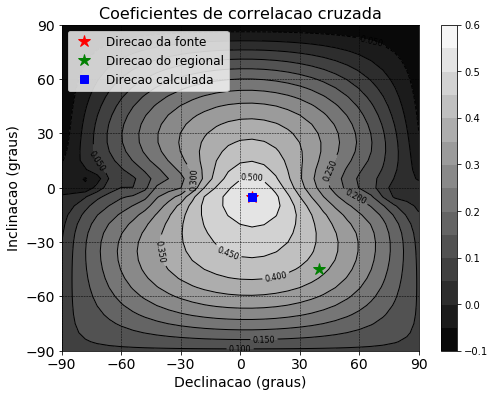

In [56]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig5c = pyplot.contour(D5full, I5full, res5full, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D5full, I5full, res5full, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig5c, fontsize = 8)
pyplot.plot(decs, incs, 'r*', label = 'Direcao da fonte', markersize = 12)
pyplot.plot(dec, inc, 'g*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmax5full, incmax5full, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D5full.min(), D5full.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I5full.min(), I5full.max(), 7), fontsize = 14)
pyplot.legend(loc = 'upper left', fontsize = 'large')
pyplot.colorbar()
pyplot.grid(color = 'k', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/fig05-fullcorrelation_eqlayer.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [61]:
# Calculando a reducao ao polo em baixa latitude
rtp5full = rtp_layer(data, shape, layer(area, (40, 40), level), 
                     (40, 40), 0.86, inc, dec, incmax5full, decmax5full)

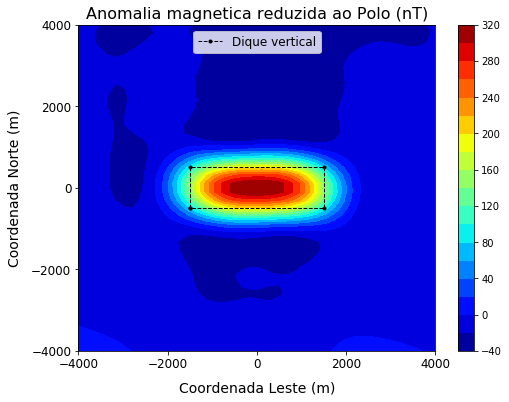

In [62]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp5full,
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike[:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper center', fontsize = 'large')

pyplot.savefig('figs-seminario2018/fig05-third-reduced-data(final).png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [70]:
# Novo grid de inclinacao e declinacao
inc5layer = numpy.linspace(-15., 15., 31)
dec5layer = numpy.linspace(-90., 90., 31)
D5layer, I5layer= numpy.meshgrid(dec5layer, inc5layer)

In [72]:
# Cria a matriz de zeros
res5layer = numpy.zeros_like(D5layer)

In [73]:
# Computando a correlação utilizando somente camada equivalente
initial = time()
for k2, d in enumerate(dec5layer):
    for k1, i in enumerate(inc5layer):
        rtp = rtp_layer(data, shape, eqlayer, shape_layer, 0.1, inc, dec, i, d)
        res5layer[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                  zderiv(xobs, yobs, rtp))    
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 304.920


In [74]:
print 'Maxima correlacao:', res5layer.max()
print 'Minima correlacao:', res5layer.min()

Maxima correlacao: 0.551997305766
Minima correlacao: -0.0708579538351


In [75]:
imax5layer, jmax5layer = numpy.where(res5layer == res5layer.max())
imin5layer, jmin5layer = numpy.where(res5layer == res5layer.min())
incmax5layer = float(I5layer[imax5layer, jmax5layer])
decmax5layer = float(D5layer[imax5layer, jmax5layer])
incmin5layer = float(I5layer[imin5layer, jmin5layer])
decmin5layer = float(D5layer[imin5layer, jmin5layer])
print '(I,D) maximo:', incmax5layer, decmax5layer
print '(I,D) minimo:', incmin5layer, decmin5layer

(I,D) maximo: -5.0 6.0
(I,D) minimo: 3.0 -78.0


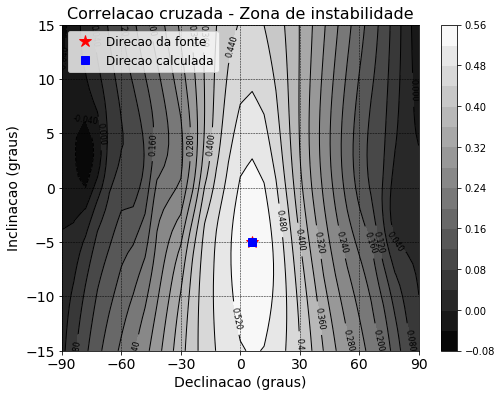

In [82]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig5c = pyplot.contour(D5layer, I5layer, res5layer, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D5layer, I5layer, res5layer, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig5c, fontsize = 8)
pyplot.plot(decs, incs, 'r*', label = 'Direcao da fonte', markersize = 12)
pyplot.plot(decmax5layer, incmax5layer, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Correlacao cruzada - Zona de instabilidade', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D5layer.min(), D5layer.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I5layer.min(), I5layer.max(), 7), fontsize = 14)
pyplot.legend(loc = 'upper left', fontsize = 'large')
pyplot.colorbar()
pyplot.grid(color = 'k', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/fig05-low_correlation_eqlayer.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [104]:
# Calculando a reducao ao polo em baixa latitude
rtp5layer = rtp_layer(data, shape, layer(area, (30, 30), 600.), 
                      (30, 30), 0.08, inc, dec, incmax5layer, decmax5layer)

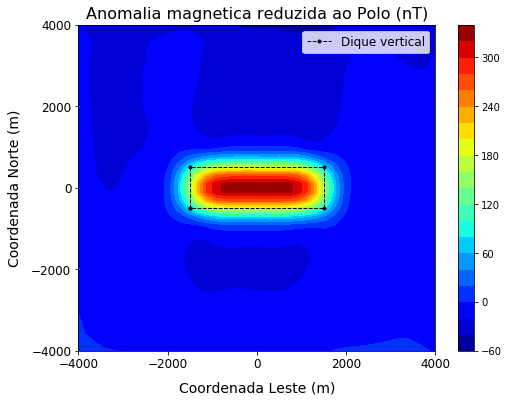

In [105]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp5layer,
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike[:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper right', fontsize = 'large')

pyplot.savefig('figs-seminario2018/fig05-fourth-reduced-data(final).png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

(Teste 6) Correlação cruzada completa

In [106]:
inc6, dec6, incs6, decs6 = -36., -21., 0. ,0.

In [107]:
# Define a anomalia do teste 6 
tf6 = prism_tf(xo, yo, zo, dike, inc6, dec6, incs6, decs6)

In [108]:
# Adicao de ruido
tf6 = addnoise(tf6, 5., 0.1)

In [109]:
# Adicao de dados
data6 = [xo, yo, zo, tf6]

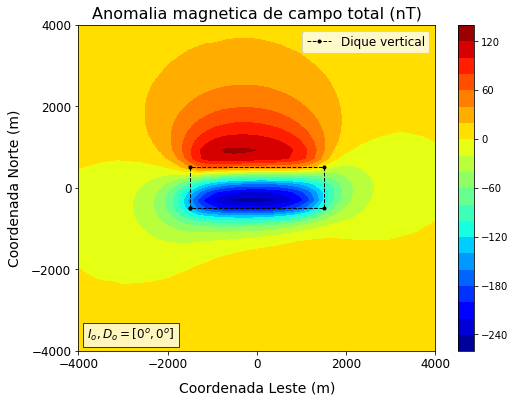

In [110]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf6.reshape(shape), 
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike[:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.text(-3800., -3700., '$I_o, D_o = [0^o, 0^o]$', 
            fontsize = 12.,bbox=dict(facecolor='white', edgecolor='k', alpha = 0.75))
pyplot.title('Anomalia magnetica de campo total (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper right', fontsize = 'large')

pyplot.savefig('figs-seminario2018/fig06-anomaly.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [111]:
# Novo grid de inclinacao e declinacao
incfull = numpy.linspace(-90., 90., 37)
decfull = numpy.linspace(-90., 90., 31)
Dfull, Ifull = numpy.meshgrid(decfull, incfull)

In [112]:
# Cria a matriz de zeros
res_full = numpy.zeros_like(Dfull)

In [113]:
# Calcula a correlação cruzada completa
initial = time()
for k2, d in enumerate(decfull):
    for k1, i in enumerate(incfull):
        if i >= -15. or i <= 15.:
            rtp = rtp_layer(data6, shape, eqlayer, shape_layer, 0.1, inc6, dec6, i, d)
            res_full[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                     zderiv(xobs, yobs, rtp))
        else:
            rtp = reduction(xobs, yobs, tf6, inc6, dec6, i, d)
            res_full[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                     zderiv(xobs, yobs, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 393.792


In [116]:
print 'Maxima correlacao:', res_full.max()
print 'Minima correlacao:', res_full.min()

Maxima correlacao: 0.569951376335
Minima correlacao: -0.0573391116846


In [117]:
imaxfull, jmaxfull = numpy.where(res_full == res_full.max())
iminfull, jminfull = numpy.where(res_full == res_full.min())
incmaxfull = float(Ifull[imaxfull, jmaxfull])
decmaxfull = float(Dfull[imaxfull, jmaxfull])
incminfull = float(Ifull[iminfull, jminfull])
decminfull = float(Dfull[iminfull, jminfull])
print '(I,D) maximo:', incmaxfull, decmaxfull
print '(I,D) minimo:', incminfull, decminfull

(I,D) maximo: 0.0 0.0
(I,D) minimo: 0.0 78.0


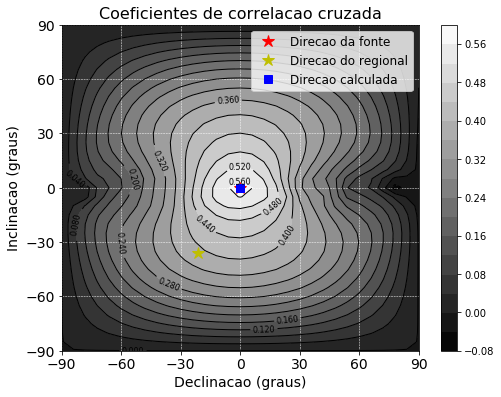

In [120]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig6 = pyplot.contour(Dfull, Ifull, res_full, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(Dfull, Ifull, res_full, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig6, fontsize = 8)
pyplot.plot(decs6, incs6, 'r*', label = 'Direcao da fonte', markersize = 12)
pyplot.plot(dec6, inc6, 'y*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmaxfull, incmaxfull, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(Dfull.min(), Dfull.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(Ifull.min(), Ifull.max(), 7 ), fontsize = 14)
pyplot.legend(loc = 'upper right', fontsize = 'large')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/fig06-full_correlation.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [128]:
# Calculando a reducao ao polo em baixa latitude
rtp6layer = rtp_layer(data6, shape, layer(area, (40, 40), 700.), (40,40 ),
                      0.008, inc6, dec6, incmaxfull, decmaxfull)

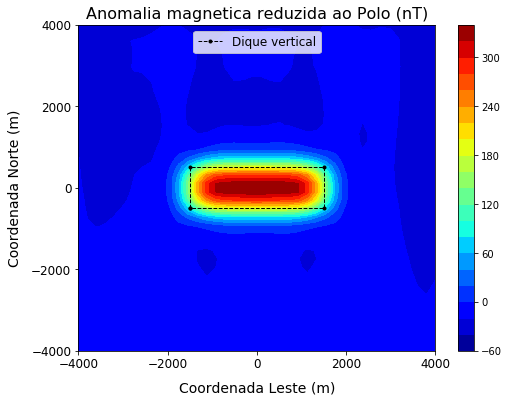

In [129]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp6layer,
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike[:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper center', fontsize = 'large')

pyplot.savefig('figs-seminario2018/fig06-reduced-to-pole-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

(Teste 7) Conjunto de fontes em baixa latitude geográfica

In [140]:
# Define os modelos
dike1 = [1000., 1200., -1500., 1500., 200., 2000., 1.]
dike2 = [-1200., -1000., -1500., 1500., 200., 2000., 1.]

In [141]:
# Definição dos valores para campo magnético e magnetização da fonte
inc7, dec7 = -10., 10.
incs7, decs7 = 0., 0.

In [142]:
# Calcula a anomalia de campo total
tf7 = prism_tf(xo, yo, zo, dike1, inc7, dec7, incs7, decs7) + \
      prism_tf(xo, yo, zo, dike2, inc7, dec7, incs7, decs7)

In [143]:
# Analise do dado
print 'Anomalia magnetica:'
_ = analysis(tf7, 'nT')

Anomalia magnetica:
Minimum:    -90.9562 nT
Maximum:    21.6709 nT
Mean value: -2.0372 nT
Variation:  112.6271 nT


In [144]:
# Adicao de ruido
tf7 = addnoise(tf7, 4., 0.1)

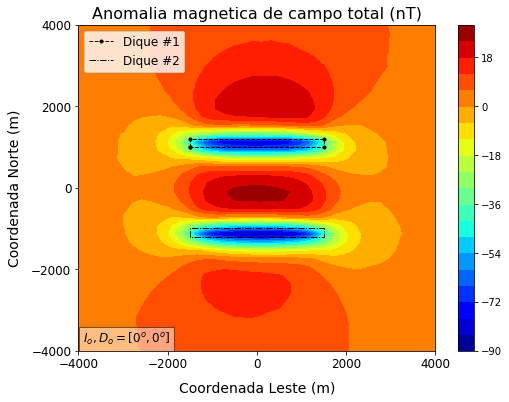

In [145]:
# Plota os resultados
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf7.reshape(shape), 
                20, cmap = pyplot.cm.jet)
# Contorno dos modelos
draw_prism(dike1[:4], linewidth=1., style = 'k.--' , label = 'Dique #1', xy2ne = True)
draw_prism(dike2[:4], linewidth=1., style = 'k-.' , label = 'Dique #2', xy2ne = True)
pyplot.text(-3900., -3800., '$I_o, D_o = [0^o, 0^o]$', fontsize = 12., 
            bbox=dict(facecolor='white', edgecolor='k', alpha = 0.5))
pyplot.title('Anomalia magnetica de campo total (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper left', fontsize = 'large')
pyplot.savefig('figs-seminario2018/fig07-anomaly.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [147]:
# Construindo uma camada equivalente
newarea_layer = area_layer
newshape_layer = shape_layer
level = 800.

In [148]:
# Calcula a camada equivalente
eqlayer = layer(area_layer, shape_layer, level)

In [149]:
# Aloca todos os valores em uma lista
data7 = [xo, yo, zo, tf7]

In [150]:
# Grid de inclinacao e declinacao
incfull = numpy.linspace(-90., 90., 37)
decfull = numpy.linspace(-90., 90., 31)
Dfull, Ifull = numpy.meshgrid(decfull, incfull)

In [151]:
# Cria a matriz de zeros
res7 = numpy.zeros_like(Dfull)

In [152]:
# Reshape dos dados
xobs = xo.reshape(shape)
yobs = yo.reshape(shape)
tf7 = tf7.reshape(shape)

In [153]:
# Calcula a correlação cruzada completa
initial = time()
for k2, d in enumerate(decfull):
    for k1, i in enumerate(incfull):
        if i >= -15. or i <= 15.:
            rtp = rtp_layer(data7, shape, eqlayer, shape_layer, 0.1, inc7, dec7, i, d)
            res7[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                     zderiv(xobs, yobs, rtp))
        else:
            rtp = reduction(xobs, yobs, tf7, inc7, dec7, i, d)
            res7[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                     zderiv(xobs, yobs, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 378.279


In [154]:
print 'Maxima correlacao:', res7.max()
print 'Minima correlacao:', res7.min()

Maxima correlacao: 0.553169618658
Minima correlacao: -0.21776507638


In [155]:
imax7, jmax7 = numpy.where(res7 == res7.max())
imin7, jmin7 = numpy.where(res7 == res7.min())
incmax7 = float(Ifull[imax7, jmax7])
decmax7 = float(Dfull[imax7, jmax7])
incmin7 = float(Ifull[imin7, jmin7])
decmin7 = float(Dfull[imin7, jmin7])
print '(I,D) maximo:', incmax7, decmax7
print '(I,D) minimo:', incmin7, decmin7

(I,D) maximo: 0.0 -6.0
(I,D) minimo: 5.0 84.0


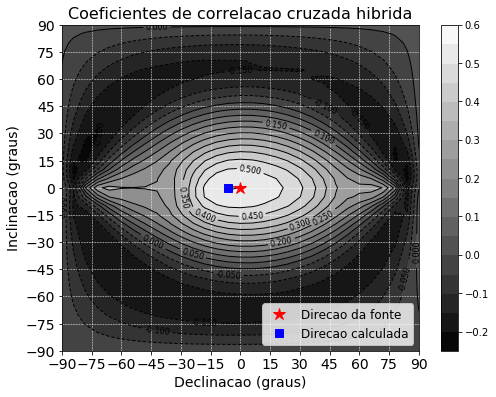

In [157]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig7 = pyplot.contour(Dfull, Ifull, res7, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(Dfull, Ifull, res7, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig7, fontsize = 8)
pyplot.plot(decs7, incs7, 'r*', label = 'Direcao da fonte', markersize = 12)
pyplot.plot(decmax7, incmax7, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Coeficientes de correlacao cruzada hibrida', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(Dfull.min(), Dfull.max(), 13), fontsize = 14)
pyplot.yticks(numpy.linspace(Ifull.min(), Ifull.max(), 13), fontsize = 14)
pyplot.legend(loc = 'lower right', fontsize = 'large')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/fig07-full_correlation.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [192]:
# Calculando a reducao ao polo em baixa latitude
rtp7 = rtp_layer(data7, shape, layer(area, (30, 30), 2000.), (30,30),
                      0.02, inc7, dec7, incmax7, decmax7)

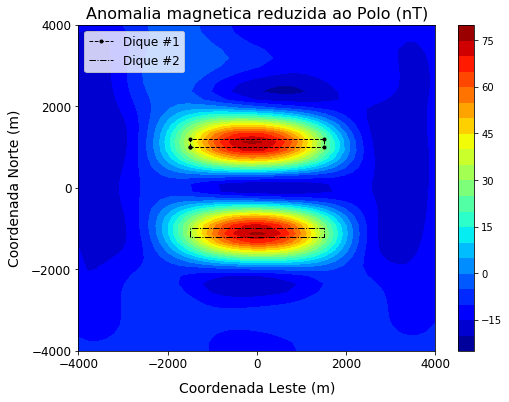

In [194]:
# Plotting the result
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp7,
                20, cmap = pyplot.cm.jet)
# Draw the model edges
draw_prism(dike1[:4], linewidth=1., style = 'k.--' , label = 'Dique #1', xy2ne = True)
draw_prism(dike2[:4], linewidth=1., style = 'k-.' , label = 'Dique #2', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper left', fontsize = 'large')

pyplot.savefig('figs-seminario2018/fig07-reduced-to-pole-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()